In [19]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [2]:
dataFile='./u_data.csv'
m_info=pd.read_csv(dataFile,sep="\t",header=None,encoding = "ISO-8859-1", names =['user_id', 'movie_id','rating','timestamp'])

In [3]:
m_info.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
list(m_info[m_info['user_id'] == 196].movie_id)

[242,
 393,
 381,
 251,
 655,
 67,
 306,
 238,
 663,
 111,
 580,
 25,
 286,
 94,
 692,
 8,
 428,
 1118,
 70,
 66,
 257,
 108,
 202,
 340,
 287,
 116,
 382,
 285,
 1241,
 1007,
 411,
 153,
 13,
 762,
 173,
 1022,
 845,
 269,
 110]

In [5]:
m_info.movie_id.value_counts()

50      583
258     509
100     508
181     507
294     485
       ... 
1648      1
1571      1
1329      1
1457      1
1663      1
Name: movie_id, Length: 1682, dtype: int64

In [6]:
m_info.shape

(100000, 4)

In [7]:
item_names = ['movie_id', 'movie title', 'release_date', 'video release date',
              'IMDb_URL', 'unknown', 'Action', 'Adventure' , 'Animation', "Children's", 'Comedy' ,
              'Crime' , 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 
              'Sci-Fi' , 'Thriller', 'War', 'Western']
m_item=pd.read_csv('./u_item.csv',sep="|",header=None,encoding = "ISO-8859-1",names = item_names)

In [8]:
m_item.head()

,movie_id,movie title,release_date,video release date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
m_item.shape

(1682, 24)

In [10]:
m_item.content=m_item[['movie_id',
            'Action', 'Adventure' , 'Animation', "Children's", 'Comedy' ,
              'Crime' , 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 
              'Sci-Fi' , 'Thriller', 'War', 'Western']]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [11]:
m_item.content=m_item.content.set_index('movie_id')

In [12]:
m_item.content.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [13]:
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import normalize

mic_normalized = pd.DataFrame(normalize(m_item.content,axis=0))
mic_normalized.columns = m_item.content.columns
mic_normalized.index = m_item.content.index
mic_normalized

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.154303,0.090536,0.044499,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.063119,0.086066,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.063119,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.063119,0.0,0.0
4,0.063119,0.000000,0.000000,0.000000,0.044499,0.000000,0.0,0.037139,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.095783,0.0,0.037139,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.063119,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.037139,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.063628,0.0,0.063119,0.0,0.0
1680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.037139,0.0,0.0,0.0,0.0,0.0,0.063628,0.0,0.000000,0.0,0.0


In [14]:
def recommender(distance_method,user_id, movie_id, N):
    # create dataframe used to store distances between recipes
    allMs = pd.DataFrame(mic_normalized.index)
    
    # remove rows where index is equal to the inputted recipe_id
    allMs = allMs[allMs.movie_id != movie_id]
    
    # add a distance column that states the inputted recipe's distance with every other recipe
    allMs["distance"] = allMs["movie_id"].apply(lambda x: distance_method(mic_normalized.loc[movie_id],mic_normalized.loc[x]))
    
    # sort the allRecipes by distance and take N closes number of rows to put in the TopNRecommendation as the recommendations
    TopNRecommendation = allMs.sort_values(["distance"]).head(N)
    k = m_item.content.loc[TopNRecommendation.movie_id]
    #print(list(TopNRecommendation.movie_id))
    for i in list(TopNRecommendation.movie_id):
        if i in list(m_info[m_info['user_id'] == user_id].movie_id):
            k = k.drop(index=[i])
    return k
            

    # for each recipe in TopNRecommendation, input to defined lists
    #for movieid in TopNRecommendation.movie_id:
       # show_recipe(movieid)
    
    # return dataframe with the inputted recipe and the recommended recipe's normalized nutritional values
   # return m_item.content.loc[TopNRecommendation.movie_id]

In [15]:
recommender(euclidean, 4,4, 5)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,
74,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
388,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
456,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1183,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
391,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
usermovieRatingMatrix=pd.pivot_table(m_info, values='rating',
                                    index=['user_id'], columns=['movie_id'])
usermovieRatingMatrix.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
usermovieRatingMatrix.shape

(943, 1682)

In [54]:
userFile='./u_user.csv'
user_info=pd.read_csv(userFile,sep="|",header=None,encoding = "ISO-8859-1",names = ['user_id' ,'age', 'gender','occupation', 'zip code'
] )
user_info.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


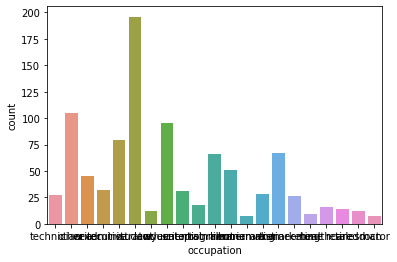

In [58]:
import seaborn as sns

sns.countplot(x= 'occupation', data=user_info)

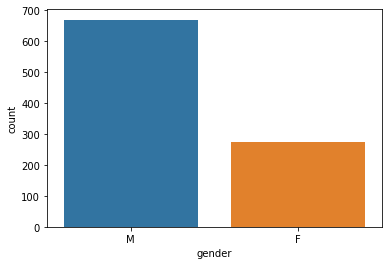

In [59]:
sns.countplot(x='gender',data = user_info)

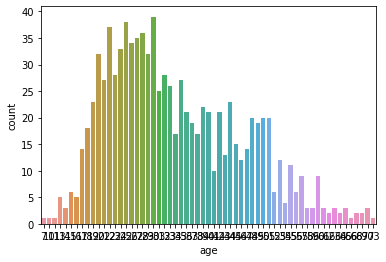

In [66]:
sns.countplot(x='age',data=user_info)

In [99]:
data_item = pd.merge(m_info[['user_id', 'movie_id', 'rating']], m_item, on='movie_id')
data_item.drop(columns = ['user_id', 'movie_id', 'release_date', 'video release date', 'IMDb_URL'], inplace=True)

In [96]:
data_item.head()

,rating,movie title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3,Kolya (1996),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,Kolya (1996),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,Kolya (1996),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Kolya (1996),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Kolya (1996),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
gFile='./u_genre.csv'
g_info=pd.read_csv(gFile,sep="|",header=None,encoding = "ISO-8859-1")

In [109]:
list(g_info[0])

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [101]:
top_1_genre = pd.DataFrame()
for gen in list(g_info[0]):
    g_r = data_item[data_item[gen] == 1]
    new_gen = pd.DataFrame(g_r.groupby(['movie title'], as_index=False)['rating'].mean().sort_values(['rating', 'movie title'], ascending=[False, True]).head(1))
    new_gen.insert(0, 'genre', gen)
    top_1_genre = top_1_genre.append(new_gen, ignore_index=True)

top_1_genre

,genre,movie title,rating
0,unknown,unknown,3.444444
1,Action,Star Wars (1977),4.358491
2,Adventure,Star Kid (1997),5.000000
3,Animation,"Close Shave, A (1995)",4.491071
4,Children's,Star Kid (1997),5.000000
5,Comedy,Santa with Muscles (1996),5.000000
6,Crime,They Made Me a Criminal (1939),5.000000
7,Documentary,"Great Day in Harlem, A (1994)",5.000000
8,Drama,Aiqing wansui (1994),5.000000
9,Fantasy,Star Kid (1997),5.000000


In [117]:
data_item[data_item['Action']==1]

,rating,movie title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
828,2,"Hunt for Red October, The (1990)",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
829,3,"Hunt for Red October, The (1990)",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
830,4,"Hunt for Red October, The (1990)",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
831,4,"Hunt for Red October, The (1990)",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
832,4,"Hunt for Red October, The (1990)",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99931,3,Mirage (1995),0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99945,3,Men of Means (1998),0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99946,1,Men of Means (1998),0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99956,1,Condition Red (1995),0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [130]:
dataFile='./u_occupation.csv'
oc_info=pd.read_csv(dataFile,sep="\t",header=None,encoding = "ISO-8859-1", names = ['occupation'])
oc_info

,occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


In [121]:
data_user_og = pd.merge(m_info[['user_id', 'movie_id', 'rating']], user_info[['user_id', 'occupation']], on='user_id')
data_user_og.drop(columns = ['user_id'], inplace=True)
data_user_item_og = pd.merge(data_user_og[['movie_id', 'rating', 'occupation']], m_item, on='movie_id')
data_user_item_og.drop(columns = ['movie_id'], inplace=True)

In [136]:
top_3_occ_genre = pd.DataFrame()
for occ in list(oc_info['occupation']):
    occ_table = data_user_item_og[data_user_item_og['occupation']==occ]
    for gen in list(g_info[0]):
        g_o_r = occ_table[occ_table[gen] == 1]
        new_occ_gen = pd.DataFrame(g_o_r.groupby(['movie title'], as_index=False)['rating'].mean().sort_values(['rating', 'movie title'], ascending=[False, True]).head(3))
        new_occ_gen.insert(0, 'genre', gen)
        new_occ_gen.insert(0, 'occupation', occ)
        top_3_occ_genre = top_3_occ_genre.append(new_occ_gen, ignore_index=True)
        
top_3_occ_genre


,occupation,genre,movie title,rating
0,administrator,Action,Congo (1995),5.000000
1,administrator,Action,"Magnificent Seven, The (1954)",4.583333
2,administrator,Action,"Princess Bride, The (1987)",4.565217
3,administrator,Adventure,"Big Blue, The (Grand bleu, Le) (1988)",5.000000
4,administrator,Adventure,Congo (1995),5.000000
...,...,...,...,...
1132,writer,War,Henry V (1989),4.444444
1133,writer,War,"Killing Fields, The (1984)",4.333333
1134,writer,Western,Dead Man (1995),4.500000
1135,writer,Western,"Good, The Bad and The Ugly, The (1966)",4.000000


In [20]:
usermovieRatingMatrixM=usermovieRatingMatrix.as_matrix()

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

# item to item CF

In [56]:
usermovieRatingMatrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
usermovieRatingMatrix = usermovieRatingMatrix.fillna(0)

In [35]:
similarity_df = usermovieRatingMatrix.corr(method='pearson')
similarity_df

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
movie_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.234595,0.193362,0.226213,0.128840,0.015113,0.347354,0.254490,0.209502,0.104655,...,0.018215,-0.029676,-0.029676,-0.029676,0.018215,-0.029676,-0.029676,-0.029676,0.034179,0.034179
2,0.234595,1.000000,0.190649,0.409044,0.240712,0.030062,0.220022,0.206020,0.077894,0.072906,...,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,0.071415,0.071415
3,0.193362,0.190649,1.000000,0.227849,0.141368,0.065347,0.258855,0.078636,0.146181,0.079608,...,-0.009764,-0.009764,-0.009764,-0.009764,0.023964,-0.009764,-0.009764,-0.009764,-0.009764,0.091421
4,0.226213,0.409044,0.227849,1.000000,0.237298,0.021878,0.295489,0.352800,0.229922,0.138220,...,-0.016619,-0.016619,0.088984,0.088984,0.025622,-0.016619,-0.016619,-0.016619,0.046743,0.067863
5,0.128840,0.240712,0.141368,0.237298,1.000000,-0.008594,0.205289,0.145866,0.142541,-0.033746,...,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,0.088618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,-0.029676,-0.012451,-0.009764,-0.016619,-0.009889,-0.005159,-0.026036,-0.017230,-0.021125,-0.010138,...,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,1.000000,1.000000,1.000000,-0.001062,-0.001062
1679,-0.029676,-0.012451,-0.009764,-0.016619,-0.009889,-0.005159,-0.026036,-0.017230,-0.021125,-0.010138,...,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,1.000000,1.000000,1.000000,-0.001062,-0.001062
1680,-0.029676,-0.012451,-0.009764,-0.016619,-0.009889,-0.005159,-0.026036,-0.017230,-0.021125,-0.010138,...,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,1.000000,1.000000,1.000000,-0.001062,-0.001062


In [159]:
def get_similarity(movie_id,user_rating):
    score = similarity_df[movie_id]*(user_rating-2.5)
    score = score.sort_values(ascending = False)
    return score

def similarity(movielist):
    similar_movies = pd.DataFrame()
    for movie, rating in movielist:
        similar_movies = similar_movies.append(get_similarity(movie, rating),ignore_index = True)
    return similar_movies.sum().sort_values(ascending =False).head(18)

In [160]:
l = [(1,5),(2,5)]
similarity(l)

1      3.086486
2      3.086486
95     2.100729
161    2.077956
403    2.022430
82     2.012097
233    2.011801
96     1.999688
228    1.974444
568    1.956732
385    1.944970
195    1.906508
62     1.886047
231    1.871235
79     1.870964
28     1.868686
174    1.866350
181    1.862839
dtype: float64

# SVD

In [54]:
pip install surprise

     |████████████████████████████████| 6.4 MB 2.5 MB/s eta 0:00:01     |█████████████████████████       | 5.0 MB 2.5 MB/s eta 0:00:01
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp37-cp37m-macosx_10_9_x86_64.whl size=832463 sha256=59ab6de892efa57843cca02ad514bd155f0b032d8346d40836c1ba7dac0b98f2
  Stored in directory: /Users/Marcochenym/Library/Caches/pip/wheels/14/21/49/2712122e4f70026a9f8c7e0bb6b77fd1da5e84778ec27af6a7
Successfully built scikit-surprise
Note: you may need to restart the kernel to use updated packages.


In [77]:
import numpy as np
from collections import defaultdict
import surprise
from surprise.reader import Reader
from surprise import Dataset
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import NMF
np.random.seed(2020)

In [62]:
reader = Reader(rating_scale=(0.5,5))
# classsurprise.reader.Reader(name=None, line_format=u'user item rating', sep=None, rating_scale=(1, 5), skip_lines=0)
#datamf=pd.pivot_table(m_info, values='rating',
                                   # index=['user_id'], columns=['movie_id'])
datamf = Dataset.load_from_df(m_info[["user_id","movie_id","rating"]],reader= reader)
# There is also .load_from_file() to read csv file.
trainset = datamf.build_full_trainset()
testset = trainset.build_anti_testset()

In [140]:
def rmse_vs_factors(algorithm, data):
    rmse = []
    for k in range(1, 25, 1):
        algo = algorithm(n_factors = k)
        loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean() 
        # (algo (The algorithm to evaluate.), data (dataset), 
                # measures=[u'rmse', u'mae'], cv=None, return_train_measures=False, n_jobs=1, pre_dispatch=u'2*n_jobs', verbose=False)
        rmse.append(loss_fce)
    
    return rmse

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_rmse(rmse,algo):
    plt.figure(num=None,figsize=(11,5))
    plt.subplot(2,1,1)
    plt.plot(rmse)
    plt.xlim(0,23)
    plt.title("{} Performance: RMSE against number of factors".format(algo),size = 20)
    plt.ylabel("Mean RMSE (cv=5)")
    
    plt.subplot(2,1,2)
    plt.plot(rmse)
    plt.xlim(0,23)
    plt.xticks(np.arange(0,23, step = 2))
    
    plt.xlabel("{} (n_factor = k)".format(algo))
    plt.ylabel("Mean RMSE (cv=5)")
    plt.axvline(np.argmin(rmse), color = 'r')

#plot_rmse(rmse,"SVD")

In [163]:
#GridsearchCV
param_grid={'n_factors': [13,15, 18]}
gs = GridSearchCV(NMF, param_grid, measures=['rmse'] ,cv=5)
gs.fit(datamf)

In [162]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9336654582836342
{'n_factors': 36}


In [120]:
algo_svd = SVD(n_factors = 36)
algo_svd.fit(trainset)
pred = algo_svd.test(testset)

pred[0:3]

[Prediction(uid=196, iid=302, r_ui=3.52986, est=4.153977643120968, details={'was_impossible': False}),
 Prediction(uid=196, iid=377, r_ui=3.52986, est=2.5743676371295616, details={'was_impossible': False}),
 Prediction(uid=196, iid=51, r_ui=3.52986, est=3.4589699181207045, details={'was_impossible': False})]

In [115]:
def top_n_recommendation(predictions, userid, moviesdf, ratingdf, n=10):
    top_n = defaultdict(list)
    for uid,iid,true,est,details in predictions:
        top_n[uid].append((iid,est))
    
    for uid,user_ratings in top_n.items():
        user_ratings.sort(key = lambda x:x[1], reverse = True)
        top_n[uid] = user_ratings[:n]
    
    preds_df = pd.DataFrame([(id,pair[0],pair[1]) for id, row in top_n.items() for pair in row],
                           columns = ["user_id", "movie_id", "rate_pred"])
    #print(preds_df)
    
    preds_user = preds_df[preds_df["user_id"] == (userid)].merge(m_item, how = 'left'
                                                                 ,left_on ='movie_id',right_on='movie_id')
    
    return preds_user

In [174]:
pred_SVD_186=top_n_recommendation(pred,userid=186,moviesdf=m_item,ratingdf=m_info)

      user_id  movie_id  rate_pred
0         196      1466        5.0
1         196      1158        5.0
2         196      1536        5.0
3         196      1599        5.0
4         196      1467        5.0
...       ...       ...        ...
9425      941       357        5.0
9426      941       169        5.0
9427      941        57        5.0
9428      941      1099        5.0
9429      941      1070        5.0

[9430 rows x 3 columns]


In [122]:
print(pred_SVD_124[['movie_id','rate_pred','movie title']])

   movie_id  rate_pred                                        movie title
0       408   4.232107                              Close Shave, A (1995)
1       169   4.210489                         Wrong Trousers, The (1993)
2        64   4.126086                   Shawshank Redemption, The (1994)
3       318   4.117287                            Schindler's List (1993)
4       114   4.095501  Wallace & Gromit: The Best of Aardman Animatio...
5       357   4.091847             One Flew Over the Cuckoo's Nest (1975)
6       483   4.088831                                  Casablanca (1942)
7       513   4.084762                              Third Man, The (1949)
8        12   4.058746                         Usual Suspects, The (1995)
9       178   4.040170                                12 Angry Men (1957)


In [141]:
rmse_nmf = rmse_vs_factors(NMF,datamf)
print(rmse_nmf)

[1.2994135800930215, 1.2083701602481693, 1.1419585176787963, 1.0950071889802726, 1.0577164160430659, 1.033972104559781, 1.0132291888621685, 0.9985954978814984, 0.9868356487740899, 0.9797860447783785, 0.972200612834186, 0.9730629460975688, 0.9658736826820883, 0.9630488078064502, 0.9666167085660214, 0.9615553046928691, 0.9646847448280365, 0.9621604408402027, 0.9649198965779929, 0.9665433097738688, 0.9690410230833237, 0.9732082296968916, 0.9718819822303804, 0.9735472150690431]


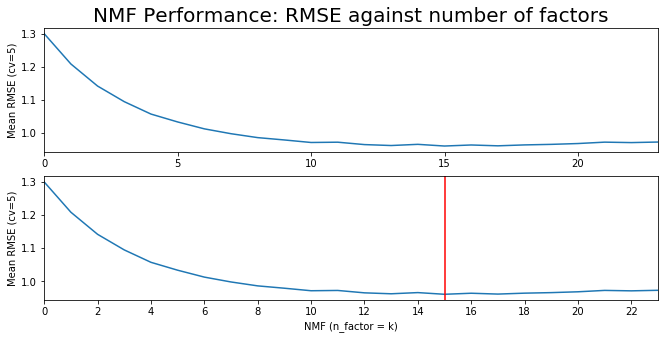

In [151]:
plot_rmse(rmse_nmf, "NMF")

In [ ]:
param_grid={'n_factors': [4, 6, 9, 11]}
gs = GridSearchCV(NMF, param_grid, measures=['rmse'] ,cv=5)
gs.fit(datamf)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])


In [164]:
algo_nmf = NMF(n_factors = 15)
algo_nmf.fit(trainset)
pred = algo_nmf.test(testset)

print(pred[0:3])

[Prediction(uid=196, iid=302, r_ui=3.52986, est=3.964583659551264, details={'was_impossible': False}), Prediction(uid=196, iid=377, r_ui=3.52986, est=1.800256708618275, details={'was_impossible': False}), Prediction(uid=196, iid=51, r_ui=3.52986, est=3.4089824235788955, details={'was_impossible': False})]


In [168]:
pred_nmf_186=top_n_recommendation(pred,userid=186,moviesdf=m_item,ratingdf=m_info)
print(pred_nmf_186[['release_date','movie title']])

      user_id  movie_id  rate_pred
0         196      1466        5.0
1         196      1158        5.0
2         196      1536        5.0
3         196      1599        5.0
4         196      1467        5.0
...       ...       ...        ...
9425      941       357        5.0
9426      941       169        5.0
9427      941        57        5.0
9428      941      1099        5.0
9429      941      1070        5.0

[9430 rows x 3 columns]
  release_date                                        movie title
0  01-Jan-1950                                Sunset Blvd. (1950)
1  06-Dec-1996  Paradise Lost: The Child Murders at Robin Hood...
2  01-Jan-1965                Faster Pussycat! Kill! Kill! (1965)
3  24-Jan-1997                                 Prefontaine (1997)
4  01-Jan-1936                              My Man Godfrey (1936)
5  01-Jan-1997                                   Boys, Les (1997)
6  01-Jan-1994                                       Faust (1994)
7  22-Mar-1996             

In [169]:
print(pred_nmf_186[['release_date','movie title']])

  release_date                                        movie title
0  01-Jan-1950                                Sunset Blvd. (1950)
1  06-Dec-1996  Paradise Lost: The Child Murders at Robin Hood...
2  01-Jan-1965                Faster Pussycat! Kill! Kill! (1965)
3  24-Jan-1997                                 Prefontaine (1997)
4  01-Jan-1936                              My Man Godfrey (1936)
5  01-Jan-1997                                   Boys, Les (1997)
6  01-Jan-1994                                       Faust (1994)
7  22-Mar-1996                             Pather Panchali (1955)
8  05-Apr-1996             World of Apu, The (Apur Sansar) (1959)
9  28-Jun-1996  Rendezvous in Paris (Rendez-vous de Paris, Les...


In [130]:
#pred_nmf_186[['movie_id','rate_pred','movie title']].to_csv('nmf',index = False)

In [170]:
pred_nmf_186[['release_date','movie title']].to_csv('nmf',index = False)

In [171]:
nmf186 = pd.read_csv('./nmf')

In [172]:
nmf186.index+=1

In [173]:
nmf186.head(5)

,release_date,movie title
1,01-Jan-1950,Sunset Blvd. (1950)
2,06-Dec-1996,Paradise Lost: The Child Murders at Robin Hood...
3,01-Jan-1965,Faster Pussycat! Kill! Kill! (1965)
4,24-Jan-1997,Prefontaine (1997)
5,01-Jan-1936,My Man Godfrey (1936)


In [ ]:
pred_SVD_124[['movie_id','rate_pred','movie title']].to_csv('svd',index = False)
svd = pd.read_csv('./svd')
svd.index+=1

In [139]:
svd_user126.head(10)

,movie_id,rate_pred,movie title
1,408,4.232107,"Close Shave, A (1995)"
2,169,4.210489,"Wrong Trousers, The (1993)"
3,64,4.126086,"Shawshank Redemption, The (1994)"
4,318,4.117287,Schindler's List (1993)
5,114,4.095501,Wallace & Gromit: The Best of Aardman Animatio...
6,357,4.091847,One Flew Over the Cuckoo's Nest (1975)
7,483,4.088831,Casablanca (1942)
8,513,4.084762,"Third Man, The (1949)"
9,12,4.058746,"Usual Suspects, The (1995)"
10,178,4.040170,12 Angry Men (1957)


In [175]:
pred_SVD_124[['release_date','movie title']].to_csv('svd',index = False)
svd186 = pd.read_csv('./svd')
#svd186.index+=1
svd186.head(5)

,release_date,movie title
0,28-Apr-1996,"Close Shave, A (1995)"
1,01-Jan-1993,"Wrong Trousers, The (1993)"
2,01-Jan-1994,"Shawshank Redemption, The (1994)"
3,01-Jan-1993,Schindler's List (1993)
4,05-Apr-1996,Wallace & Gromit: The Best of Aardman Animatio...


In [176]:
import os

AttributeError: module 'os' has no attribute 'get_pwd'